In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay)

In [3]:
data = pd.read_csv('data.csv', delimiter=';')
data.head(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
data.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
print(data.isna().sum())

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [7]:
print(data.duplicated().sum())

0


In [8]:
print(data.nunique())

Marital_status                                    6
Application_mode                                 18
Application_order                                 8
Course                                           17
Daytime_evening_attendance                        2
Previous_qualification                           17
Previous_qualification_grade                    101
Nacionality                                      21
Mothers_qualification                            29
Fathers_qualification                            34
Mothers_occupation                               32
Fathers_occupation                               46
Admission_grade                                 620
Displaced                                         2
Educational_special_needs                         2
Debtor                                            2
Tuition_fees_up_to_date                           2
Gender                                            2
Scholarship_holder                                2
Age_at_enrol

In [9]:
data_preprocessing = data.copy()

In [10]:
data_preprocessing.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [11]:
data_preprocessing['Marital_status'] = data_preprocessing['Marital_status'].replace({
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto union',
    6: 'legally separated'
})
Previous_qualification_mapping = {
    1: "Secondary education",
    2: "Higher education - bachelor's degree",
    3: "Higher education - degree",
    4: "Higher education - master's",
    5: "Higher education - doctorate",
    6: "Frequency of higher education",
    9: "12th year of schooling - not completed",
    10: "11th year of schooling - not completed",
    12: "Other - 11th year of schooling",
    14: "10th year of schooling",
    15: "10th year of schooling - not completed",
    19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    42: "Professional higher technical course",
    43: "Higher education - master (2nd cycle)"
}
data_preprocessing['Previous_qualification'] = data_preprocessing['Previous_qualification'].map(Previous_qualification_mapping)

occupation_mapping = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors, and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers, and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',
    7: 'Skilled Workers in Industry, Construction, and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: 'Blank',
    101: 'Armed Forces Officers',
    102: 'Armed Forces Sergeants',
    103: 'Other Armed Forces personnel',
    112: 'Directors of administrative and commercial services',
    114: 'Hotel, catering, trade and other services directors',
    121: 'Specialists in the physical sciences, mathematics, engineering, and related techniques',
    122: 'Health professionals',
    123: 'Teachers',
    124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
    125: 'Specialists in information and communication technologies (ICT)',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    135: 'Information and communication technology technicians',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'Personal service workers',
    152: 'Sellers',
    153: 'Personal care workers and the like',
    154: 'Protection and security services personnel',
    161: 'Market-oriented farmers and skilled agricultural and animal production workers',
    163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
    171: 'Skilled construction workers and the like, except electricians',
    172: 'Skilled workers in metallurgy, metalworking and similar',
    173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
    174: 'Skilled workers in electricity and electronics',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    181: 'Fixed plant and machine operators',
    182: 'Assembly workers',
    183: 'Vehicle drivers and mobile equipment operators',
    191: 'cleaning workers',
    192: 'Unskilled workers in agriculture, animal production, fisheries, and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants',
    195: 'Street vendors (except food) and street service providers'
}

data_preprocessing['Mothers_occupation'] = data_preprocessing['Mothers_occupation'].map(occupation_mapping)
data_preprocessing['Fathers_occupation'] = data_preprocessing['Fathers_occupation'].map(occupation_mapping)

data_preprocessing['Daytime_evening_attendance'] = data_preprocessing['Daytime_evening_attendance'].replace({
    1: 'daytime',
    0: 'evening'
})

data_preprocessing['Displaced'] = data_preprocessing['Displaced'].replace({
    1: 'yes',
    0: 'no'
})

data_preprocessing['Educational_special_needs'] = data_preprocessing['Educational_special_needs'].replace({
    1: 'yes',
    0: 'no'
})

data_preprocessing['Debtor'] = data_preprocessing['Debtor'].replace({
    1: 'yes',
    0: 'no'
})

data_preprocessing['Tuition_fees_up_to_date'] = data_preprocessing['Tuition_fees_up_to_date'].replace({
    1: 'yes',
    0: 'no'
})

data_preprocessing['Gender'] = data_preprocessing['Gender'].replace({
    1: 'male',
    0: 'female'
})

data_preprocessing['International'] = data_preprocessing['International'].replace({
    1: 'yes',
    0: 'no'
})

data_preprocessing['Scholarship_holder'] = data_preprocessing['Scholarship_holder'].replace({
    1: 'yes',
    0: 'no'
})

kebangsaan_map = {
    1: 'Portuguese', 
    2: 'German', 
    6: 'Spanish', 
    11: 'Italian', 
    13: 'Dutch', 
    14: 'English', 
    17 : 'Lithuanian', 
    21 : 'Angolan', 
    22 : 'Cape Verdean', 
    24 : 'Guinean', 
    25 : 'Mozambican', 
    26 : 'Santomean', 
    32 : 'Turkish', 
    41 : 'Brazilian', 
    62 : 'Romanian', 
    100 : 'Moldova (Republic of)', 
    101 : 'Mexican', 
    103 : 'Ukrainian', 
    105 : 'Russian', 
    108 : 'Cuban', 
    109 : 'Colombian'
}

data_preprocessing['Nacionality'] = data_preprocessing['Nacionality'].map(kebangsaan_map)

course_map = {
    33: 'Biofuel Production Technologies', 
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

data_preprocessing['Course'] = data_preprocessing['Course'].map(course_map)

app_mode_map = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

data_preprocessing['Application_mode'] = data_preprocessing['Application_mode'].map(app_mode_map)

In [12]:
data_preprocessing.head(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,married,Over 23 years old,1,Management (evening attendance),evening,Basic education 3rd cycle (9th/10th/11th year)...,133.1,Portuguese,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,single,1st phase - general contingent,1,Nursing,daytime,Secondary education,142.0,Portuguese,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,single,3rd phase - general contingent,4,Tourism,daytime,Secondary education,119.0,Portuguese,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,single,1st phase - general contingent,3,Social Service,daytime,Secondary education,137.0,Romanian,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,single,1st phase - general contingent,1,Social Service,daytime,Secondary education,138.0,Portuguese,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


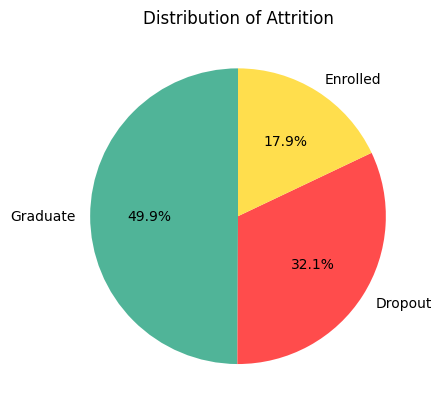

In [13]:
colors=["#FF4C4C", "#50B498", '#FFDE4D']
status_count = data_preprocessing['Status'].value_counts()
fig, ax = plt.subplots()
ax.pie(status_count, labels=['Graduate', 'Dropout', 'Enrolled'], autopct='%1.1f%%', startangle=90, colors=["#50B498", "#FF4C4C", '#FFDE4D'])
ax.set_title("Distribution of Attrition")
plt.show()

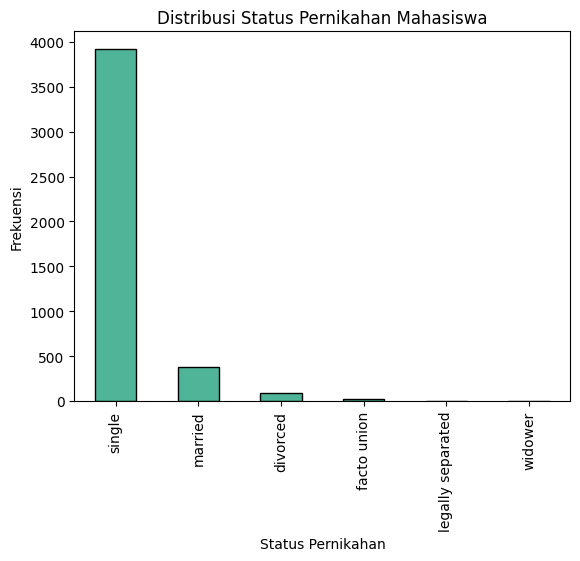

In [14]:
fig, ax = plt.subplots()
data_preprocessing['Marital_status'].value_counts().plot(kind='bar', ax=ax, color='#50B498', edgecolor='black')
ax.set_title('Distribusi Status Pernikahan Mahasiswa')
ax.set_xlabel('Status Pernikahan')
ax.set_ylabel('Frekuensi')
plt.show()

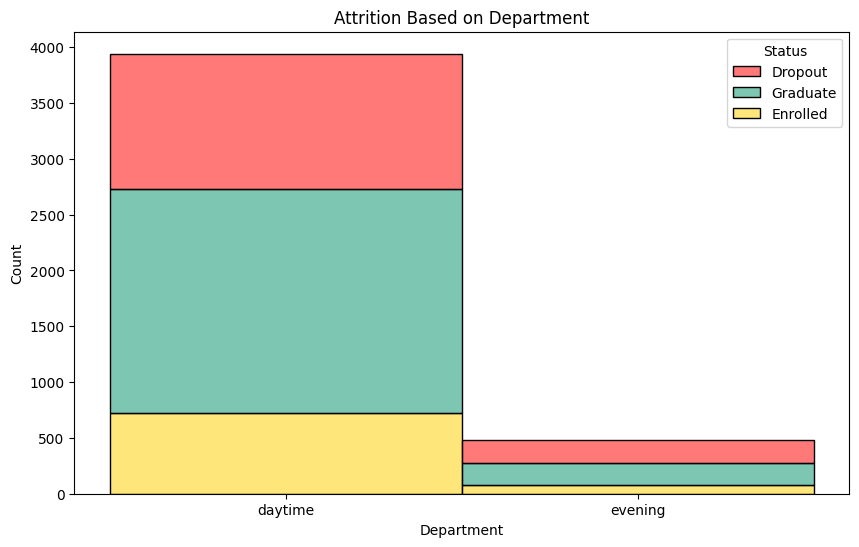

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data=data_preprocessing, x="Daytime_evening_attendance", hue="Status", multiple="stack", palette=colors)
plt.title("Attrition Based on Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

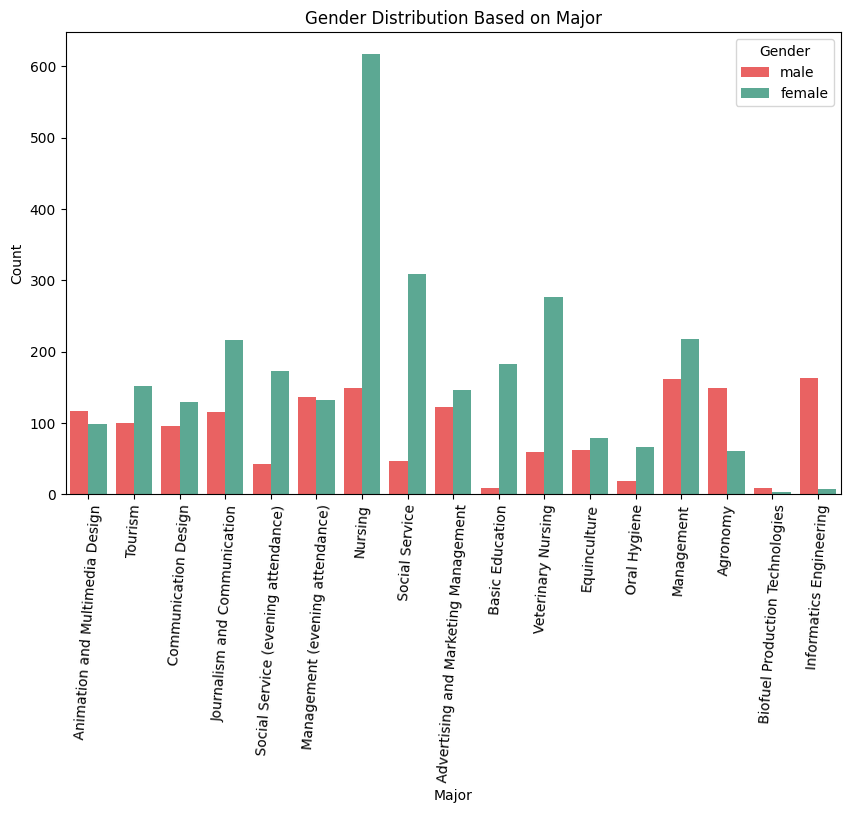

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_preprocessing, x='Course', hue='Gender', palette=['#FF4C4C', '#50B498'])
plt.title('Gender Distribution Based on Major')
plt.xlabel('Major')
plt.xticks(rotation=86)
plt.ylabel('Count')
plt.show()

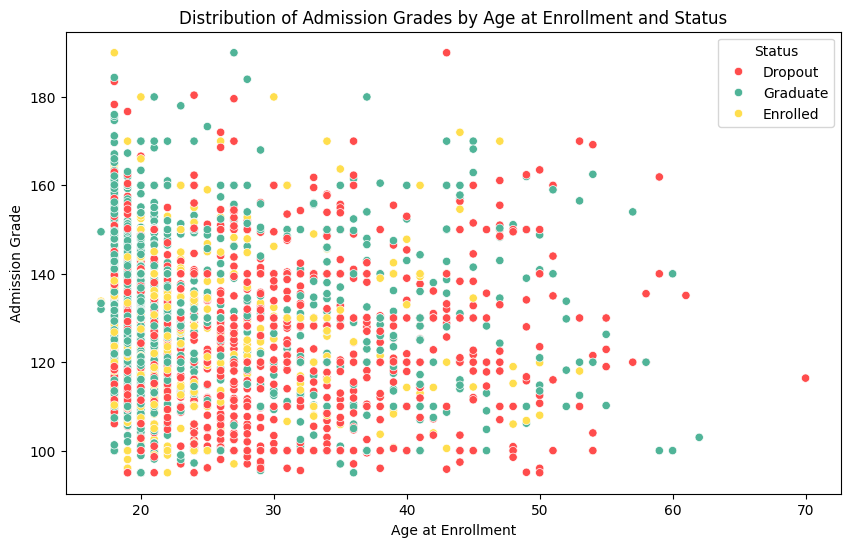

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_at_enrollment', y='Admission_grade', hue='Status', data=data_preprocessing, palette=colors)
plt.title('Distribution of Admission Grades by Age at Enrollment and Status')
plt.xlabel('Age at Enrollment')
plt.ylabel('Admission Grade')
plt.show()

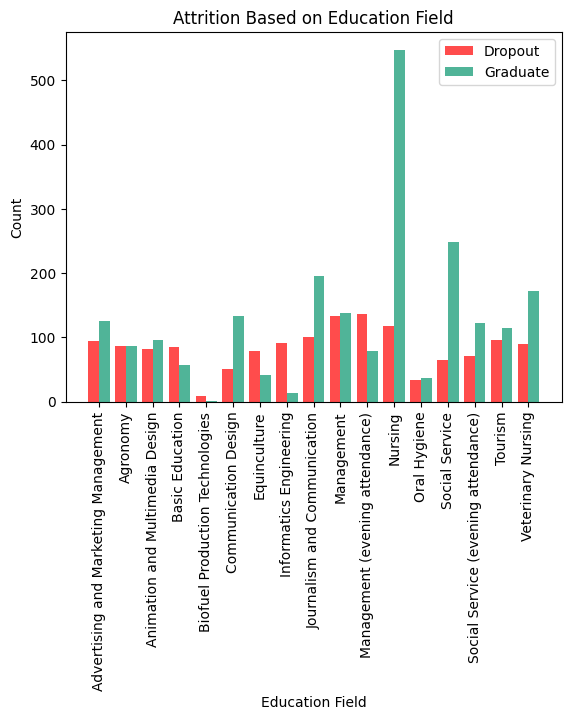

In [18]:
Dropout_count = data_preprocessing[data_preprocessing['Status'] == 'Dropout']['Course'].value_counts()
Graduate_count = data_preprocessing[data_preprocessing['Status'] == 'Graduate']['Course'].value_counts()

# Menggabungkan data untuk memastikan semua kategori tercakup
combined_count = pd.DataFrame({
    'Dropout': Dropout_count,
    'Graduate': Graduate_count
}).fillna(0)

# Menyiapkan sumbu X
X_axis = np.arange(len(combined_count))

# Membuat barchart
plt.bar(X_axis - 0.2, combined_count['Dropout'], 0.4, label='Dropout', color=colors[0])
plt.bar(X_axis + 0.2, combined_count['Graduate'], 0.4, label='Graduate', color=colors[1])

# Menambahkan label dan judul
plt.xticks(X_axis, combined_count.index, rotation=90)  # Menambahkan rotasi 90 derajat pada label sumbu X
plt.xlabel("Education Field")
plt.ylabel("Count")
plt.title("Attrition Based on Education Field")
plt.legend()

# Menampilkan visualisasi
plt.show()

In [19]:
# data_preprocessing.to_csv('dataVis.csv', index=False)

In [20]:
data = data[data['Status'] != 'Enrolled']

In [21]:
data['Status'] = data['Status'].replace({
    'Graduate' : 0,
    'Dropout' : 1
})

In [22]:
print(data['Status'].value_counts())

Status
0    2209
1    1421
Name: count, dtype: int64


In [23]:
dropout_corr = data.corr()['Status'].sort_values(ascending=False)
print(dropout_corr)

Status                                          1.000000
Age_at_enrollment                               0.267229
Debtor                                          0.267207
Gender                                          0.251955
Application_mode                                0.244507
Curricular_units_2nd_sem_without_evaluations    0.102687
Marital_status                                  0.100479
Curricular_units_1st_sem_without_evaluations    0.074642
Previous_qualification                          0.062323
Mothers_qualification                           0.053989
Inflation_rate                                  0.030326
Nacionality                                     0.015516
Educational_special_needs                       0.007254
Fathers_qualification                           0.005865
Mothers_occupation                             -0.000772
Unemployment_rate                              -0.004198
Fathers_occupation                             -0.005066
International                  

In [24]:
selected_features = dropout_corr[(dropout_corr >= 0.1) | (dropout_corr <= -0.1)].index
print("\nSelected features based on correlation criteria:\n", selected_features)
filtered_data = data[selected_features]
filtered_data.describe()


Selected features based on correlation criteria:
 Index(['Status', 'Age_at_enrollment', 'Debtor', 'Gender', 'Application_mode',
       'Curricular_units_2nd_sem_without_evaluations', 'Marital_status',
       'Previous_qualification_grade', 'Curricular_units_2nd_sem_evaluations',
       'Displaced', 'Admission_grade', 'Curricular_units_1st_sem_enrolled',
       'Curricular_units_2nd_sem_enrolled', 'Scholarship_holder',
       'Tuition_fees_up_to_date', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_approved'],
      dtype='object')


,Status,Age_at_enrollment,Debtor,Gender,Application_mode,Curricular_units_2nd_sem_without_evaluations,Marital_status,Previous_qualification_grade,Curricular_units_2nd_sem_evaluations,Displaced,Admission_grade,Curricular_units_1st_sem_enrolled,Curricular_units_2nd_sem_enrolled,Scholarship_holder,Tuition_fees_up_to_date,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_approved
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,0.391460,23.461157,0.113774,0.344077,18.421763,0.142149,1.184298,132.920606,7.763085,0.549036,127.293939,6.337466,6.296419,0.266942,0.866116,10.534860,4.791460,10.036155,4.518457
std,0.488144,7.827994,0.317580,0.475132,17.358595,0.747670,0.613009,13.238373,3.964163,0.497658,14.611295,2.570773,2.263020,0.442423,0.340575,5.057694,3.237845,5.481742,3.162376
min,0.000000,17.000000,0.000000,0.000000,1.000000,0.000000,1.000000,95.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,1.000000,0.000000,1.000000,125.000000,6.000000,0.000000,118.000000,5.000000,5.000000,0.000000,1.000000,11.000000,3.000000,10.517857,2.000000
50%,0.000000,20.000000,0.000000,0.000000,17.000000,0.000000,1.000000,133.100000,8.000000,1.000000,126.500000,6.000000,6.000000,0.000000,1.000000,12.341429,5.000000,12.333333,5.000000
75%,1.000000,25.000000,0.000000,1.000000,39.000000,0.000000,1.000000,140.000000,10.000000,1.000000,135.100000,7.000000,7.000000,1.000000,1.000000,13.500000,6.000000,13.500000,6.000000
max,1.000000,70.000000,1.000000,1.000000,57.000000,12.000000,6.000000,190.000000,33.000000,1.000000,190.000000,26.000000,23.000000,1.000000,1.000000,18.875000,26.000000,18.571429,20.000000


In [25]:
x = filtered_data.drop(['Status'], axis=1)
y = filtered_data['Status']
smt = SMOTE()
x_smt, y_smt = smt.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_smt, y_smt, test_size=0.2, random_state=22)
print(x_train.shape)
print(y_train.shape)

(3534, 18)
(3534,)


In [26]:
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)
predictRf = rf.predict(x_test)
accuracy_rf = round(accuracy_score(y_test, predictRf)*100,2)
precision_rf = round(precision_score(y_test, predictRf)*100, 2)
recall_rf = round(recall_score(y_test, predictRf)*100, 2)
f1_rf = round(f1_score(y_test, predictRf)*100, 2)
print(f"Akurasi Random Forest : {accuracy_rf}%")
print(f"Presicision Random Forest : {precision_rf}%")
print(f"Recall Random Forest : {recall_rf}%")
print(f"F1 Random Forest : {f1_rf}%")

Akurasi Random Forest : 89.48%
Presicision Random Forest : 93.03%
Recall Random Forest : 85.81%
F1 Random Forest : 89.27%


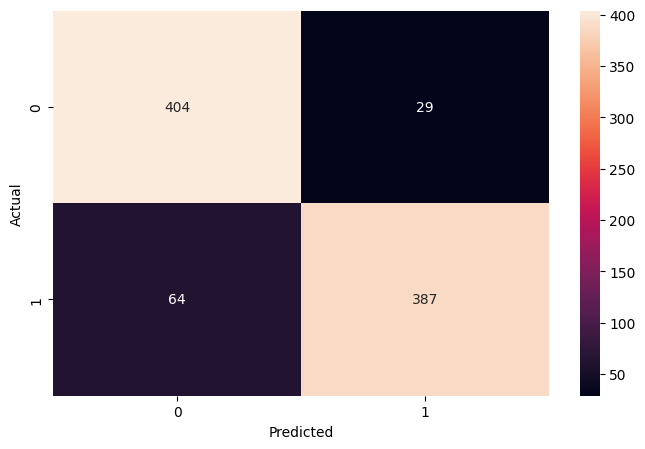

In [27]:
cm_rf = confusion_matrix(y_test, predictRf)
TNRF = cm_rf[1][1] * 1.0
FNRF = cm_rf[1][0] * 1.0
TPRF = cm_rf[0][0] * 1.0
FPRF = cm_rf[0][1] * 1.0
display_cm_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_rf, annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
nb = GaussianNB()
nb.fit(x_train, y_train)
predictNb = nb.predict(x_test)
accuracy_nb = round(accuracy_score(y_test, predictNb)*100,2)
precision_nb = round(precision_score(y_test, predictNb)*100, 2)
recall_nb = round(recall_score(y_test, predictNb)*100, 2)
f1_nb = round(f1_score(y_test, predictNb)*100, 2)
print(f"Akurasi Gaussian NB : {accuracy_nb}%")
print(f"Presicision Gaussian NB : {precision_nb}%")
print(f"Recall Gaussian NB : {recall_nb}%")
print(f"F1 Gaussian NB : {f1_nb}%")

Akurasi Gaussian NB : 84.05%
Presicision Gaussian NB : 90.36%
Recall Gaussian NB : 76.94%
F1 Gaussian NB : 83.11%


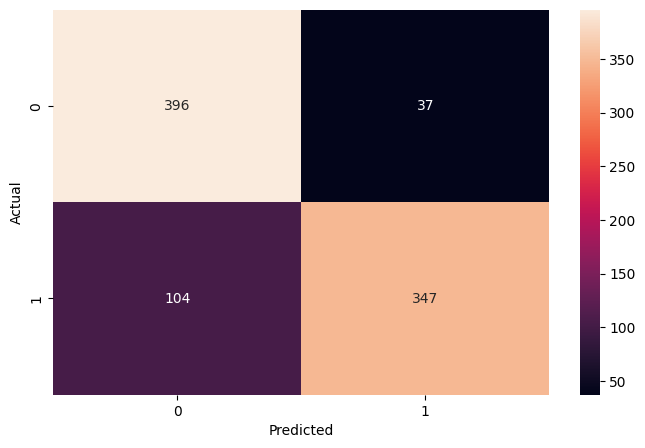

In [29]:
cm_nb = confusion_matrix(y_test, predictNb)
TNRF = cm_nb[1][1] * 1.0
FNRF = cm_nb[1][0] * 1.0
TPRF = cm_nb[0][0] * 1.0
FPRF = cm_nb[0][1] * 1.0
display_cm_rf = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_nb, annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
svc = SVC(random_state=0)
svc.fit(x_train,y_train)
predictSvc = svc.predict(x_test)
accuracy_svc = round(accuracy_score(y_test, predictSvc)*100,2)
precision_svc = round(precision_score(y_test, predictSvc)*100, 2)
recall_svc = round(recall_score(y_test, predictSvc)*100, 2)
f1_svc = round(f1_score(y_test, predictSvc)*100, 2)
print(f"Akurasi SVM : {accuracy_svc}%")
print(f"Presicision SVM : {precision_svc}%")
print(f"Recall SVM : {recall_svc}%")
print(f"F1 SVM : {f1_svc}%")

Akurasi SVM : 82.35%
Presicision SVM : 91.09%
Recall SVM : 72.51%
F1 SVM : 80.74%


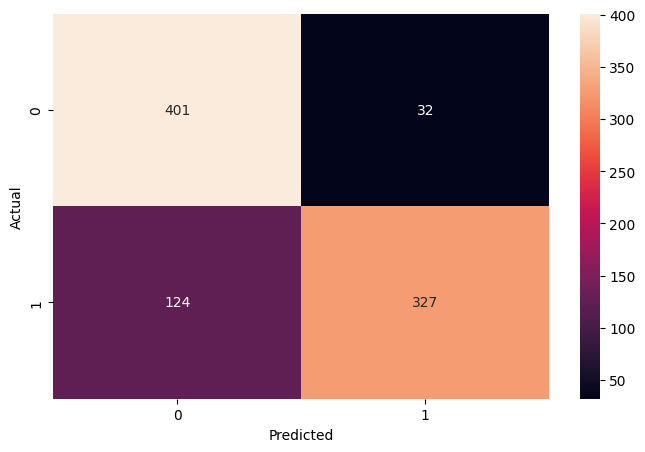

In [31]:
cm_svc = confusion_matrix(y_test, predictSvc)
TNRF = cm_svc[1][1] * 1.0
FNRF = cm_svc[1][0] * 1.0
TPRF = cm_svc[0][0] * 1.0
FPRF = cm_svc[0][1] * 1.0
display_cm_rf = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_svc, annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
predictXgb = xgb.predict(x_test)
accuracy_xgb = round(accuracy_score(y_test, predictXgb)*100,2)
precision_xgb = round(precision_score(y_test, predictXgb)*100, 2)
recall_xgb = round(recall_score(y_test, predictXgb)*100, 2)
f1_xgb = round(f1_score(y_test, predictXgb)*100, 2)
print(f"Akurasi XGBoost : {accuracy_xgb}%")
print(f"Presicision XGBoost : {precision_xgb}%")
print(f"Recall XGBoost : {recall_xgb}%")
print(f"F1 XGBoost : {f1_xgb}%")

Akurasi XGBoost : 89.37%
Presicision XGBoost : 92.0%
Recall XGBoost : 86.7%
F1 XGBoost : 89.27%


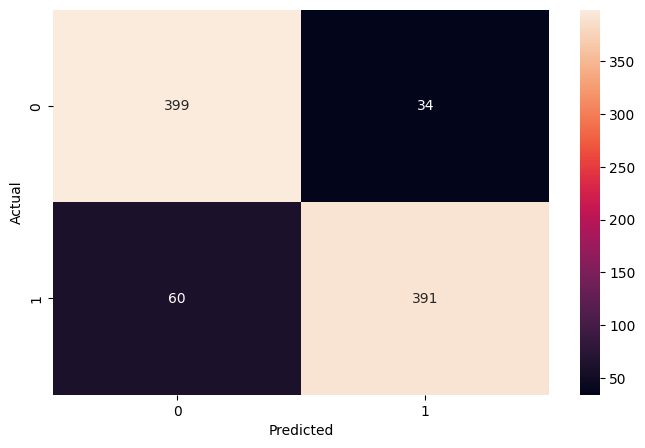

In [33]:
cm_xgb = confusion_matrix(y_test, predictXgb)
TNRF = cm_xgb[1][1] * 1.0
FNRF = cm_xgb[1][0] * 1.0
TPRF = cm_xgb[0][0] * 1.0
FPRF = cm_xgb[0][1] * 1.0
display_cm_rf = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_xgb, annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
test_data = np.array([[18, 0, 0, 1, 0, 1, 150, 5, 1, 138, 5, 5, 1, 1, 13.6, 4, 12, 5]])
result = xgb.predict(test_data)
print(result)

[0]


- 1 : 55, 0, 0, 43, 2, 1, 140, 9, 1, 124, 3,  3, 0, 1, 10, 2, 11, 1
- 0 : 18, 0, 0, 1, 0, 1, 150, 5, 1, 138, 5, 5, 1, 1, 13.6, 4, 12, 5
- 'Age_at_enrollment', 'Debtor', 'Gender', 'Application_mode',
       'Curricular_units_2nd_sem_without_evaluations', 'Marital_status',
       'Previous_qualification_grade', 'Curricular_units_2nd_sem_evaluations',
       'Displaced', 'Admission_grade', 'Curricular_units_1st_sem_enrolled',
       'Curricular_units_2nd_sem_enrolled', 'Scholarship_holder',
       'Tuition_fees_up_to_date', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_approved'

In [35]:
# with open('xgb_model.pkl', 'wb') as file:
#     pickle.dump(xgb, file)

In [36]:
pd.show_versions(as_json=False)


INSTALLED VERSIONS
------------------
commit           : 0f437949513225922d851e9581723d82120684a6
python           : 3.9.2.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.22621
machine          : AMD64
processor        : AMD64 Family 25 Model 68 Stepping 1, AuthenticAMD
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_Indonesia.1252

pandas           : 2.0.3
numpy            : 1.24.3
pytz             : 2024.1
dateutil         : 2.9.0.post0
setuptools       : 49.2.1
pip              : 20.2.3
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : 2.9.9
jinja2           : 3.1.4
IPython          : 8.18.1
pandas_datareader: None
bs4              : 4.12.3
bottleneck       : None
brotli